# Plotting and Visualization

In [1]:
%matplotlib notebook

## A Brief matplotlib API primer

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
data = np.arange(10)

In [5]:
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<IPython.core.display.Javascript object>


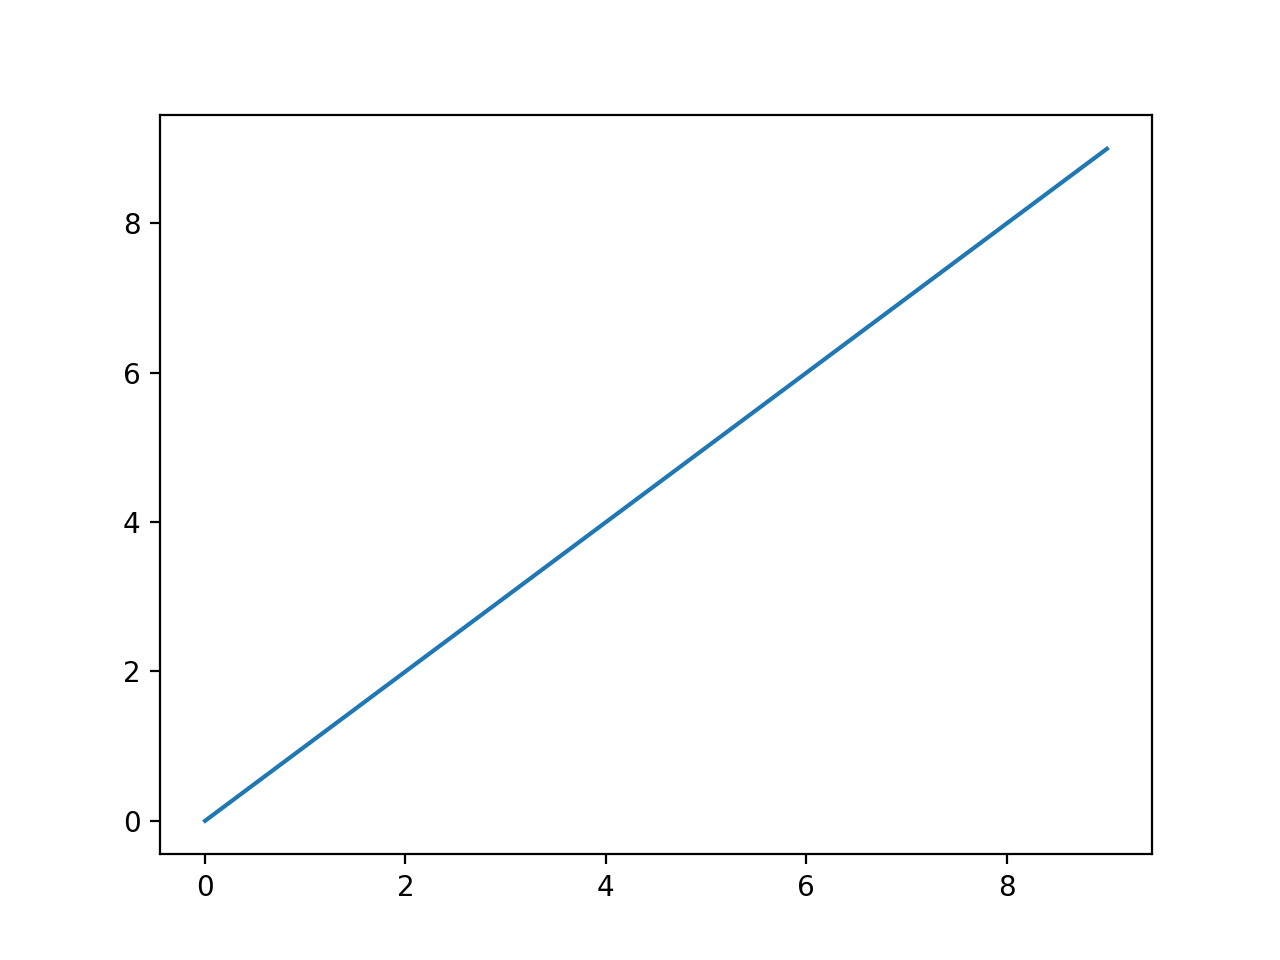

In [6]:
plt.plot(data)

While libraries like seaborn and pandas's built-in plotting functions will deal with many of the mundane details of making plots, should we wish to customize the beyond the function opitions provided, you will need to learn a bit about matplotlib API.

### Figures and Subplots

Plots in matplotlib reside within a __Figure__ object. You can create a new figure with plt.figure:

<IPython.core.display.Javascript object>


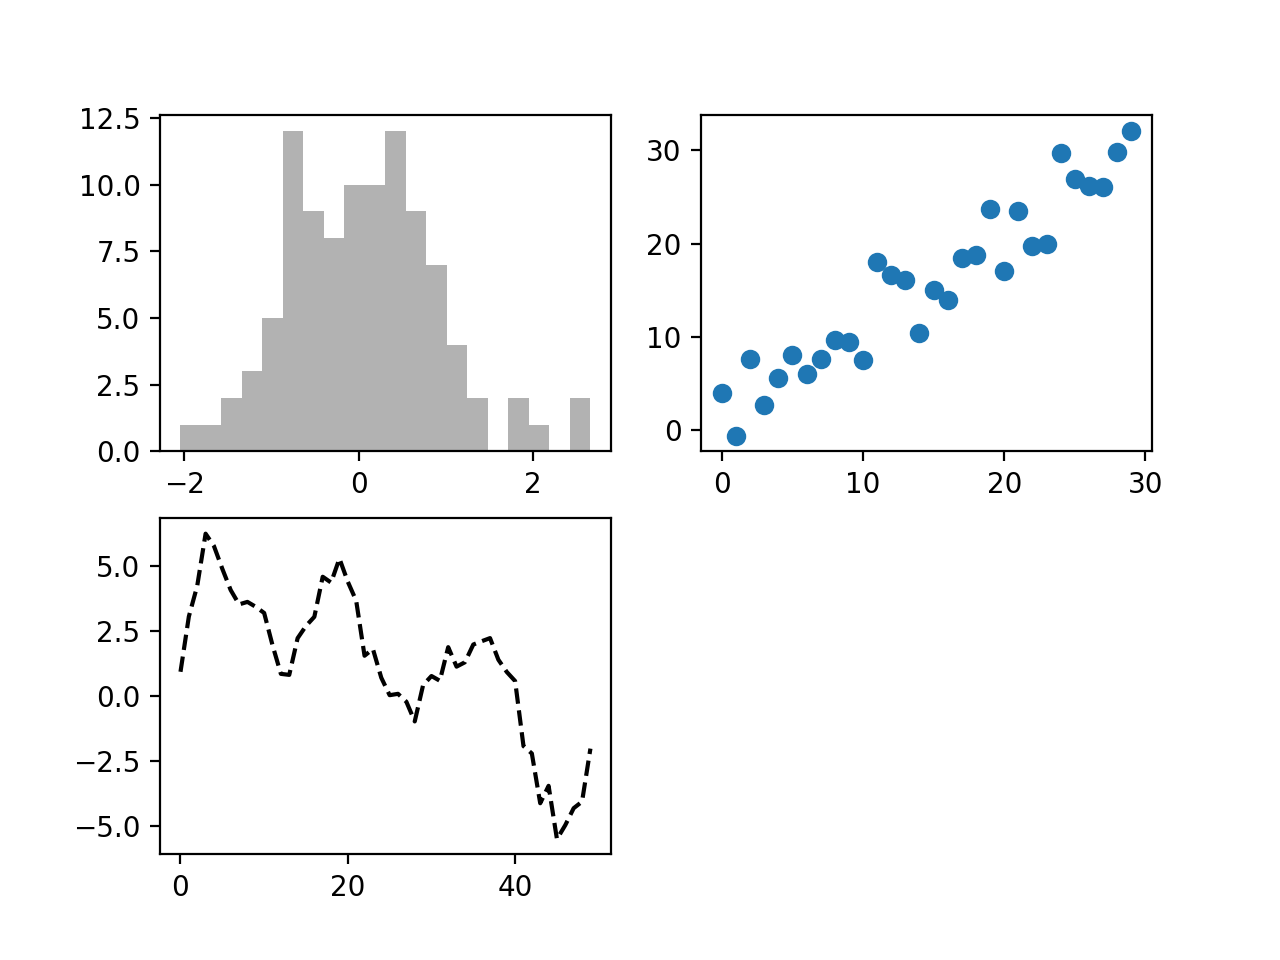

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
plt.plot(np.random.randn(50).cumsum(), 'k--')
ax1.hist(np.random.randn(100), bins=20, color = 'k', alpha = 0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

<IPython.core.display.Javascript object>


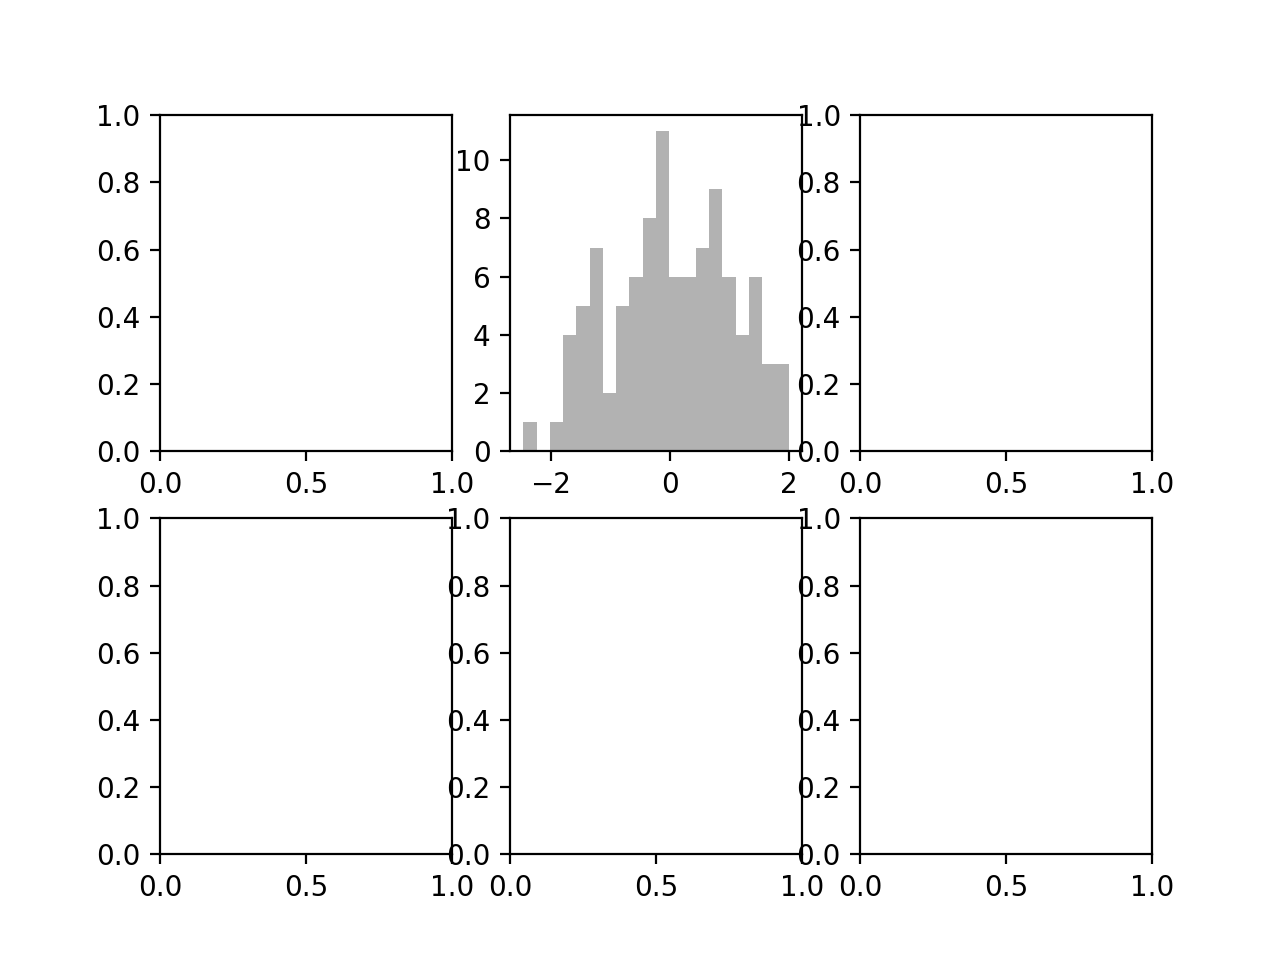

(array([ 1.,  0.,  1.,  4.,  5.,  7.,  2.,  5.,  6.,  8., 11.,  6.,  6.,
         7.,  9.,  6.,  4.,  6.,  3.,  3.]),
 array([-2.46148835, -2.23893064, -2.01637294, -1.79381523, -1.57125753,
        -1.34869983, -1.12614212, -0.90358442, -0.68102671, -0.45846901,
        -0.2359113 , -0.0133536 ,  0.2092041 ,  0.43176181,  0.65431951,
         0.87687722,  1.09943492,  1.32199263,  1.54455033,  1.76710803,
         1.98966574]),
 <a list of 20 Patch objects>)

In [8]:
fig, axes = plt.subplots(2,3)
axes[0,1].hist(np.random.randn(100), bins=20, color = 'k', alpha = 0.3)

In [9]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C3A8E25C88>,
      dtype=object)

Here the axes can be easily indexed like a two-dimensional array; for example, axes[0,1].

#### Adjusting the spacing around subplots

<IPython.core.display.Javascript object>


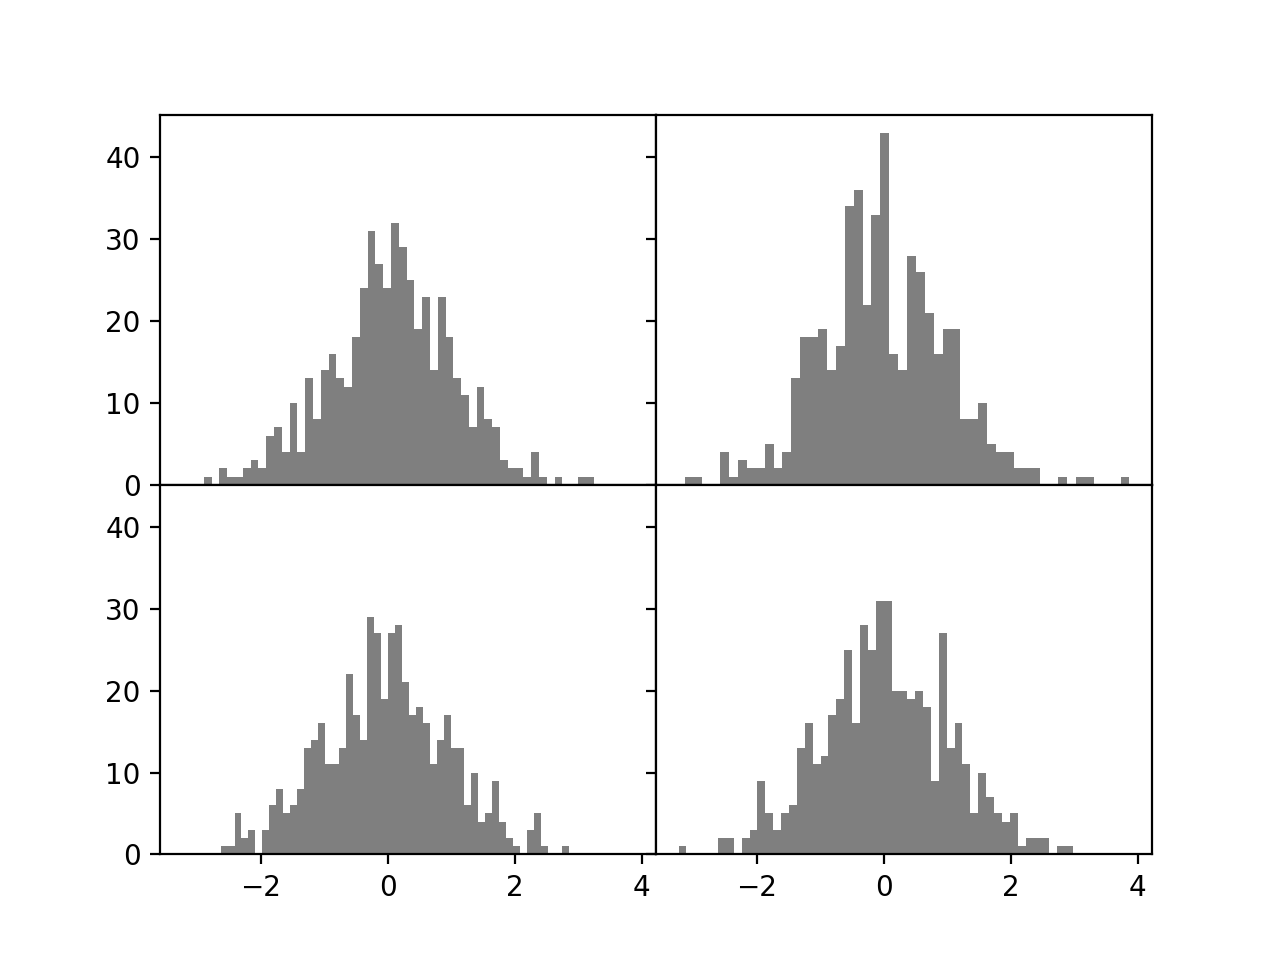

In [10]:
fig, axes = plt.subplots(2,2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500), bins = 50, color='k', alpha = 0.5)
plt.subplots_adjust(wspace=0, hspace=0)

### Colors, Markers, and Line Styles

In [11]:
# plt.plot? # call the help for the plot function

<IPython.core.display.Javascript object>


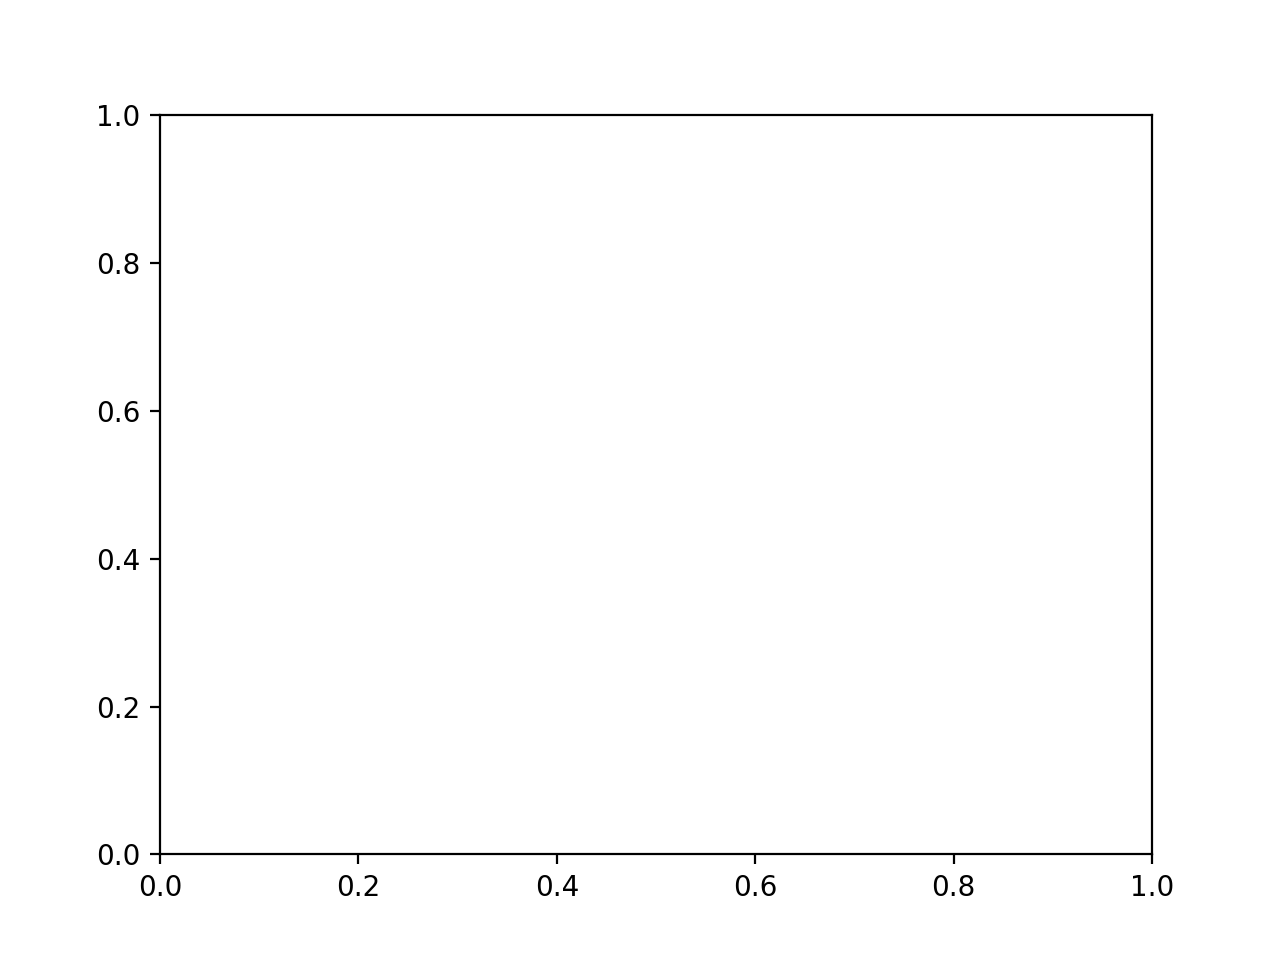

In [13]:
from numpy.random import randn
fig2, ax2 = plt.subplots()
ax2.plot(randn(30).cumsum(), 'ko--')
# OR long: ax2.plot(randn(30).cumsum(), color = 'k', linestyle = 'dashed', marker = 'o')

<IPython.core.display.Javascript object>


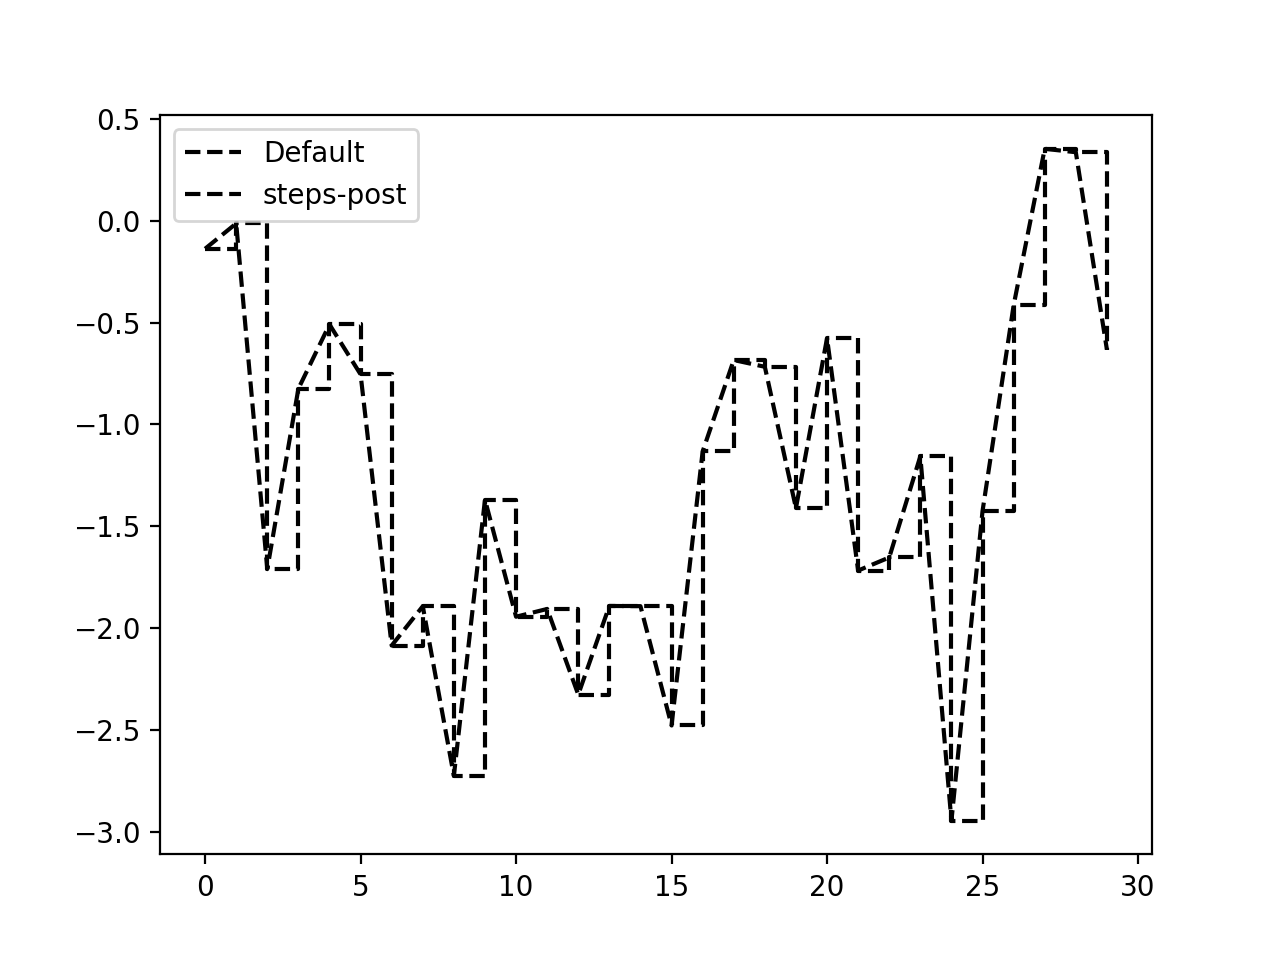

In [19]:
data = np.random.randn(30).cumsum()
fig3, ax3 = plt.subplots()
ax3.plot(data, 'k--', label='Default')
ax3.plot(data, 'k--', drawstyle = 'steps-post', label = 'steps-post')
plt.legend(loc = 'best')

### Ticks, Labels, and Legends

#### Setting the title, axis labels, ticks, and ticklabels

<IPython.core.display.Javascript object>


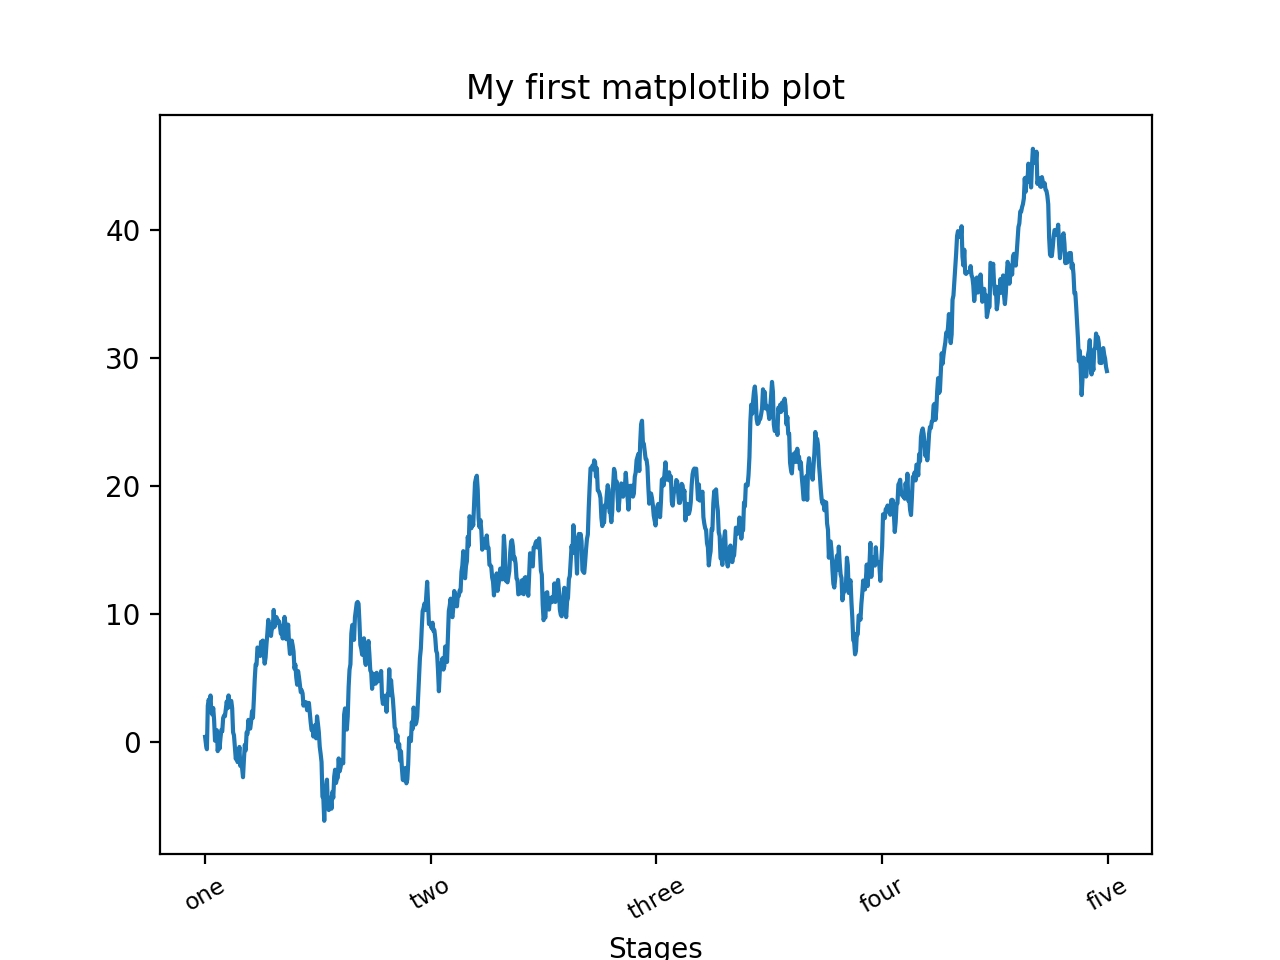

In [30]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())

In [31]:
ticks = ax.set_xticks([0,250,500,750,1000])

In [32]:
labels = ax.set_xticklabels(['one', 'two','three','four','five'], rotation=30, fontsize='small')

In [33]:
ax.set_title('My first matplotlib plot')

Text(0.5, 1.0, 'My first matplotlib plot')

In [34]:
ax.set_xlabel('Stages')

Text(0.5, 24.188360157402354, 'Stages')

#### Adding legends

<IPython.core.display.Javascript object>


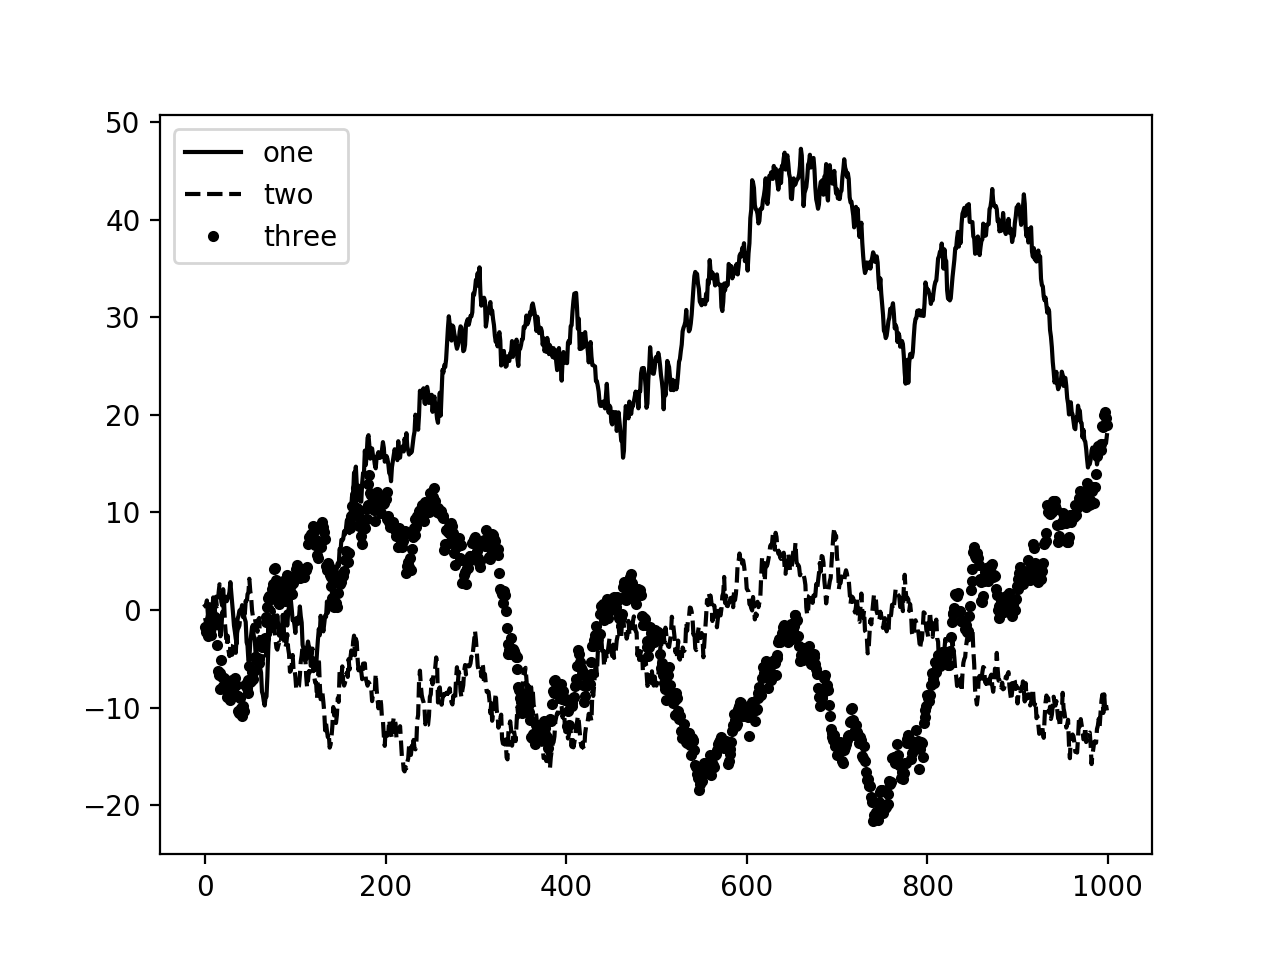

In [36]:
from numpy.random import randn
fig = plt.figure(); ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(),'k',label='one')
ax.plot(randn(1000).cumsum(),'k--',label='two')
ax.plot(randn(1000).cumsum(),'k.',label='three')
ax.legend(loc='best') # loc tells matplotlib where to place the legend plot

### Annotations and Drawing on a Subplot

In addition to the standard plot types, you may wish to draw your own plot annotations, which could consist of text, arrows, or other shapes. You can add annotations and text using the text, arrow, and annotate functions. text draws text at given coordniates (x,y) on the plot with optional custom styling.
Annotations can draw both text and arrows arranged appropriately. 

<IPython.core.display.Javascript object>


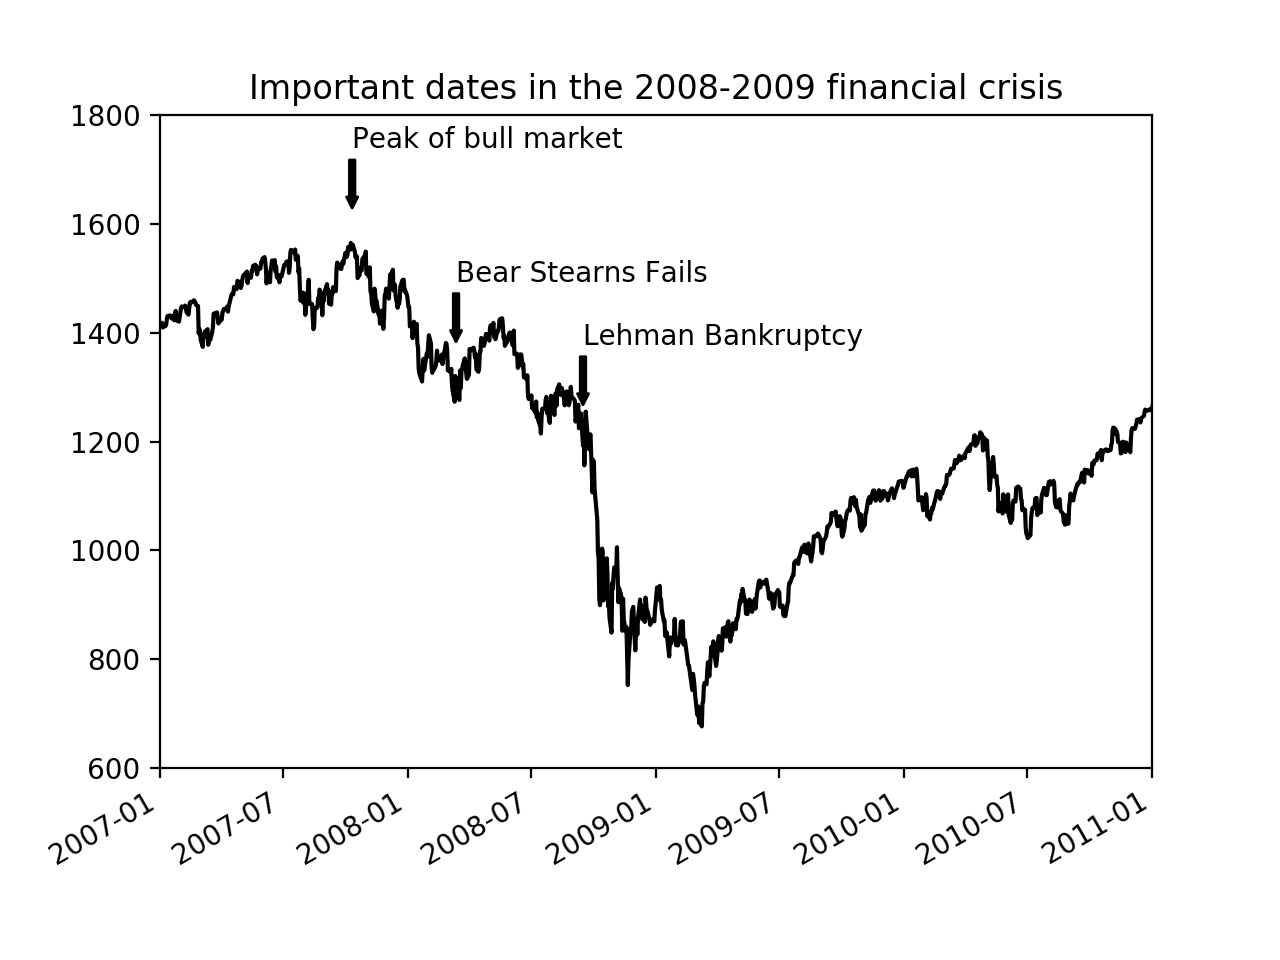

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

In [41]:
from datetime import datetime
import pandas as pd

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

data = pd.read_csv('../examples/spx.csv', index_col = 0, parse_dates = True)
spx = data['SPX']

spx.plot(ax=ax, style = 'k-')

crisis_data = [
    (datetime(2007,10,11), 'Peak of bull market'),
    (datetime(2008,3,12), 'Bear Stearns Fails'),
    (datetime(2008,9,15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date,spx.asof(date) + 75),
               xytext=(date,spx.asof(date) + 225),
               arrowprops = dict(facecolor='black', headwidth=4, width = 2,
                                headlength=4),
               horizontalalignment = 'left', verticalalignment = 'top')

# Zoom in on 2007-2010

ax.set_xlim('1/1/2007', '1/1/2011')
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

Drawing shapes requires some more care. matplotlib has objects that represent many common shapes, referred to as _patches_. Some of these, like Rectangle and Circle, are found in the matplotlib.pyplot, but the full set is located in matplotlib.patches.
To add a shape to a plot, you create the patch object shp and add it to a subplot by calling ax.add_patch(shp):

<IPython.core.display.Javascript object>


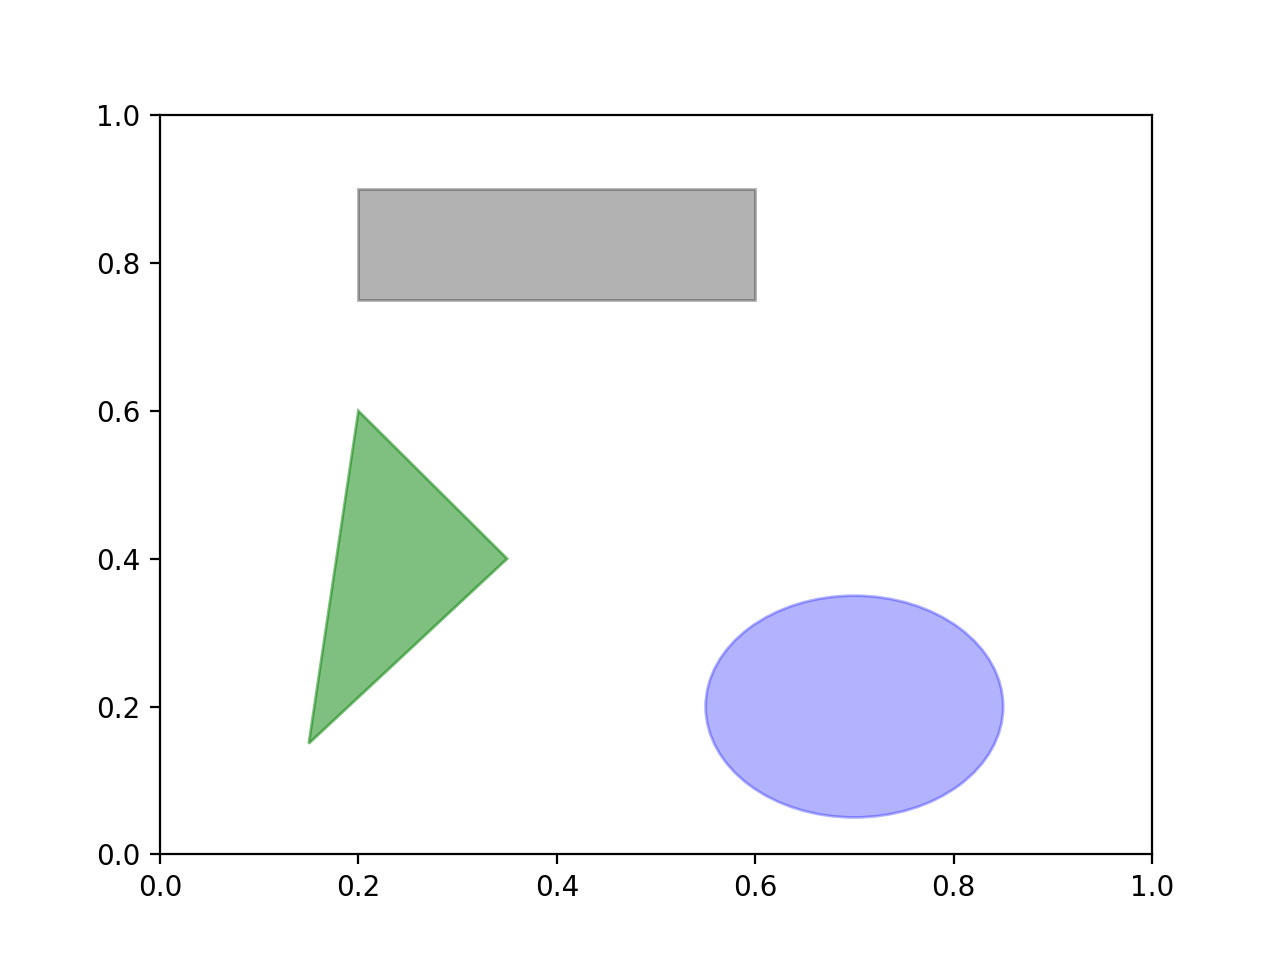

In [43]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

rect = plt.Rectangle((0.2,0.75),0.4,0.15,color='k',alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b',alpha=0.3)
pgon = plt.Polygon([[0.15,0.15],[0.35,0.4],[0.2,0.6]],color='g',alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### Saving Plots to Files

You can save the active figure to file using plt.savefig. This method is equivalent to the figure object's savefig instance method. 
To get a plot as PNG with minimal whitespace around the plot and at 400 DPI (dots-per-inch), you would do:

In [44]:
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

### matplotlib Configuration

matplotlib comes configured with color schemes and defaults that are geared primaryly toward preparing figures for publication. One way to modify the configuration programmatically from Python is to use the rc method; for example, to set the global default figure size to be 10x10, you could enter:

In [45]:
# plt.rc('figure', figsize=(10,10))

As we will see in the next section, the seaborn package has several built-in plot themes or styles that use matplotlib's configuration system internally.

## Plotting with pandas and seaborn

### Line Plots

### Bar Plots

### Histograms and Density Plots

### Scatter or Point Plots 

### Facet Grids and Categorical Data

## Other Python Visualization Tools